In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mapseq_fxns import * # import all functions from this script
# from math import log10
from scipy import stats
import random


%matplotlib inline

In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/output/'

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp


In [3]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

In [4]:
# seperate by cell type

omc_type = [sort_by_celltype(omc_bin[i]) for i in range(num_samples)]

# clean-up datasets here
omc_clean = []
for i in range(num_samples):
    omc_clean.append(clean_up_data(omc_type[i]))


omc_pt = [(omc_clean[i][omc_clean[i]['type']=="PT"]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_clean[i][omc_clean[i]['type']=="IT"]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]



/Users/eisko/github_repos/MAPseq_analysis/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
/Users/eisko/github_repos/MAPseq_analysis/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
/Users/eisko/github_repos/MAPseq_analysis/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
/Users/eisko/

In [5]:

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]
dataset_mm = []
dataset_st = []

for i in range(num_samples):
    if metadata.species[i] == 'MMus':
        omc_mm.append(omc_clean[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
        dataset_mm.append(dataset[i])
    else:
        omc_st.append(omc_clean[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])
        dataset_st.append(dataset[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)

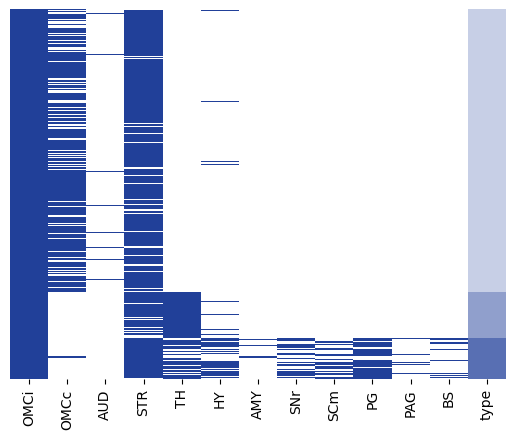

In [6]:
plot = omc_mm_all.sample(1000, random_state=10)
# sort by cell type
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)


sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
# plt.savefig(out_path+"mm_single_heatmap.jpeg", dpi=300)

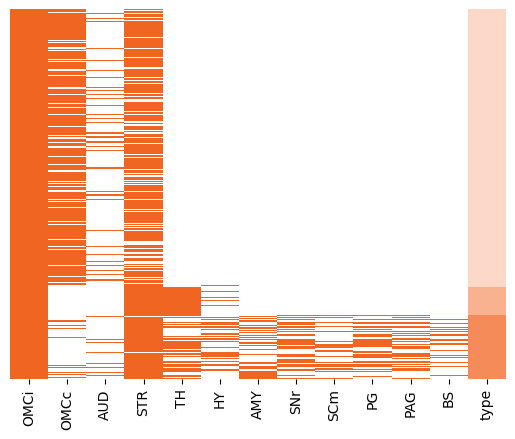

In [7]:
plot = omc_st_all.sample(1000, random_state=10)
# sort by cell type
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot, cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
# plt.savefig(out_path+"st_single_heatmap.jpeg", dpi=300)

# heatmaps of an individual animal

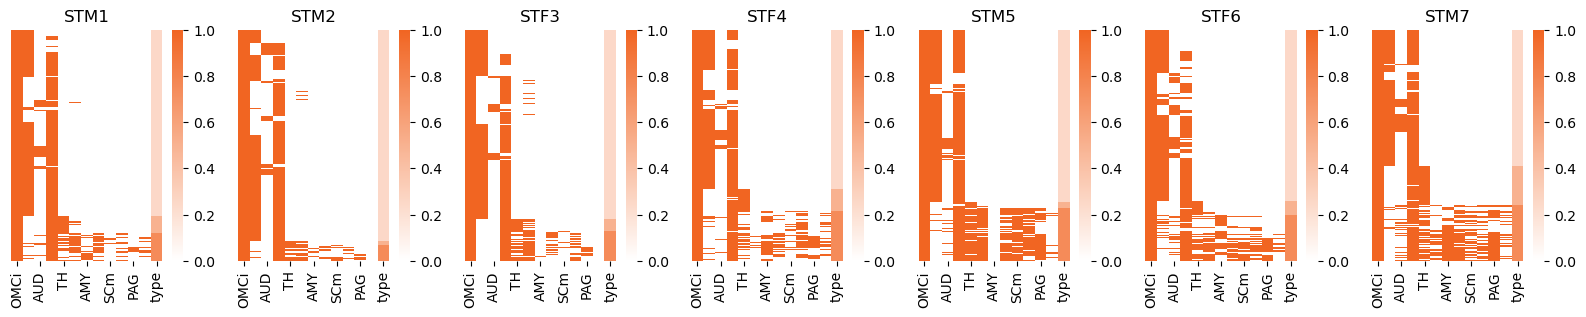

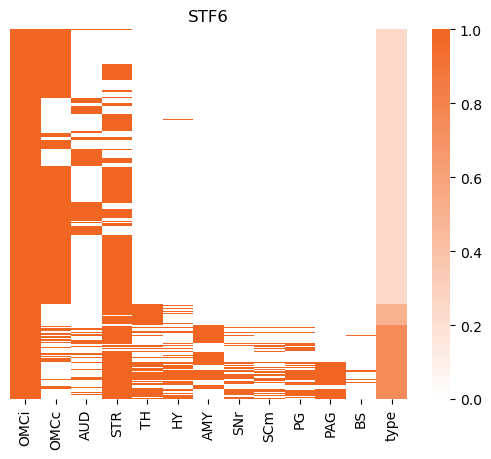

In [12]:
fig, axs = plt.subplots(1, len(omc_st), figsize=(20,3))

i=0
for ax in axs.flat:
    plot = omc_st[i]
    plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
    plot = plot.sort_values(by=['type']).reset_index(drop=True)
    sns.heatmap(plot, cmap=orange_cmp, ax=ax)
    ax.get_yaxis().set_visible(False)
    ax.set_title(mice_st[i])
    i+=1
    
# fig.savefig(out_path+"omc_st_N1_heatmaps.jpeg", dpi=300, bbox_inches="tight")
plt.show()

plot = omc_st[5]
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot, cmap=orange_cmp)
plt.gca().get_yaxis().set_visible(False)
plt.title(mice_st[5])
# plt.savefig(out_path + "st_N1_n6454_heatmap.jpeg", dpi=300, bbox_inches="tight")
plt.show()

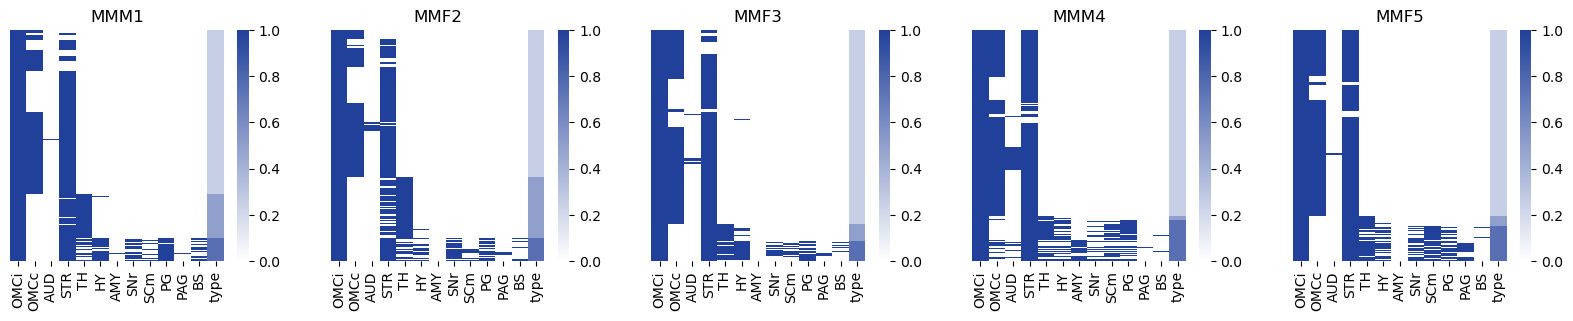

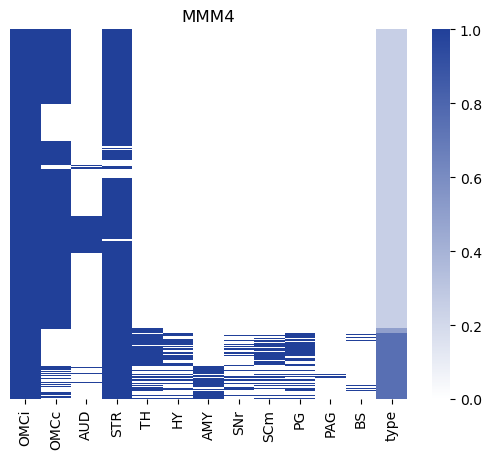

In [13]:
fig, axs = plt.subplots(1, len(omc_mm), figsize=(20,3))

i=0
for ax in axs.flat:
    plot = omc_mm[i]
    plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
    plot = plot.sort_values(by=['type']).reset_index(drop=True)
    sns.heatmap(plot, cmap=blue_cmp, ax=ax)
    ax.get_yaxis().set_visible(False)
    ax.set_title(mice_mm[i])
    i+=1
    
# fig.savefig(out_path+"omc_mm_N1_heatmaps.jpeg", dpi=300, bbox_inches="tight")
plt.show()

plot = omc_mm[3]
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot, cmap=blue_cmp)
plt.gca().get_yaxis().set_visible(False)
plt.title(mice_mm[3])
# plt.savefig(out_path + "MM_N1_n6454_heatmap.jpeg", dpi=300, bbox_inches="tight")
plt.show()

# summary plots

# histograms

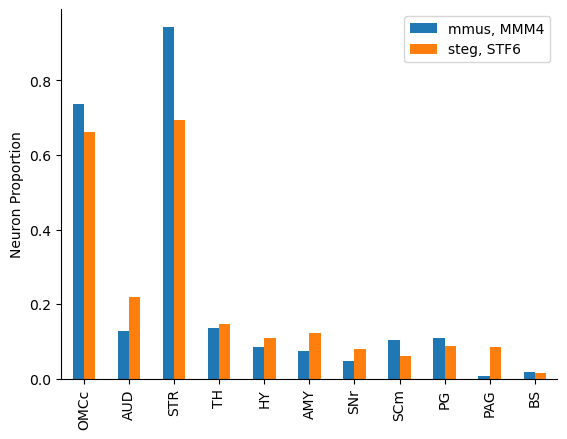

In [14]:
omc_mm_int = omc_mm[3].drop(["OMCi", "type"], axis=1)
mm_sum = omc_mm_int.sum()
mm_proportion = mm_sum/omc_mm_int.shape[0]

omc_st_int = omc_st[5].drop(["OMCi", "type"], axis=1)
st_sum = omc_st_int.sum()
st_proportion = st_sum/omc_st_int.shape[0]

plot_df = pd.DataFrame(columns=['mmus', 'steg'])
# plot_df
plot_df['mmus'] = mm_proportion
plot_df['steg'] = st_proportion

plot_df.plot(kind='bar')
plt.ylabel("Neuron Proportion")
# plt.xlabel("Node Degree")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(labels=["mmus, "+mice_mm[3], "steg, "+mice_st[5]])

# plt.savefig(out_path+"proj_hist_N1.jpeg", dpi=300, bbox_inches="tight")

Text(0, 0.5, 'Neuron Proportion')

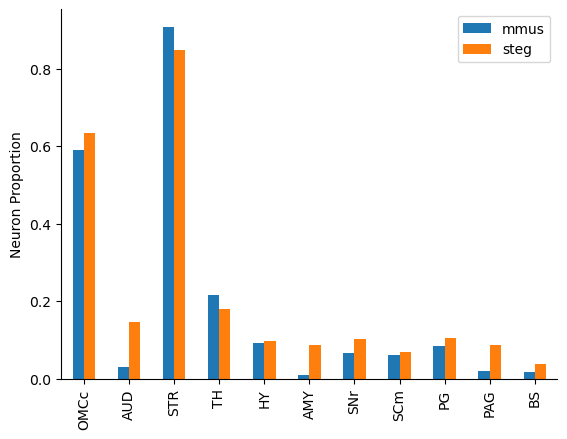

In [15]:
omc_mm_int = omc_mm_all.drop(["OMCi", "type"], axis=1)
mm_sum = omc_mm_int.sum()
mm_proportion = mm_sum/omc_mm_int.shape[0]

omc_st_int = omc_st_all.drop(["OMCi", "type"], axis=1)
st_sum = omc_st_int.sum()
st_proportion = st_sum/omc_st_int.shape[0]

plot_df = pd.DataFrame(columns=['mmus', 'steg'])
# plot_df
plot_df['mmus'] = mm_proportion
plot_df['steg'] = st_proportion


plot_df.plot(kind='bar')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel("Neuron Proportion")
# plt.savefig(out_path+'mm_st_hist.jpeg', dpi=300)

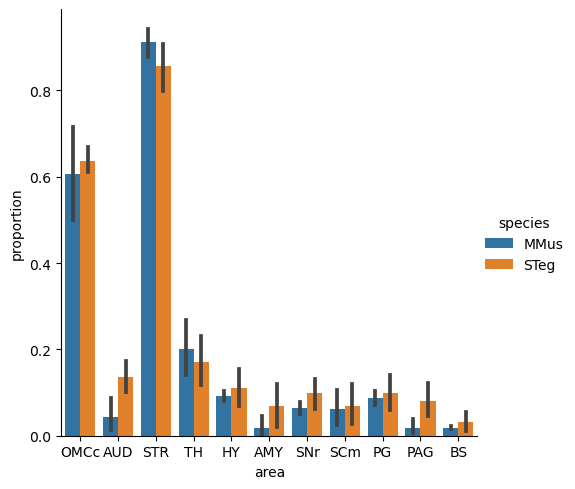

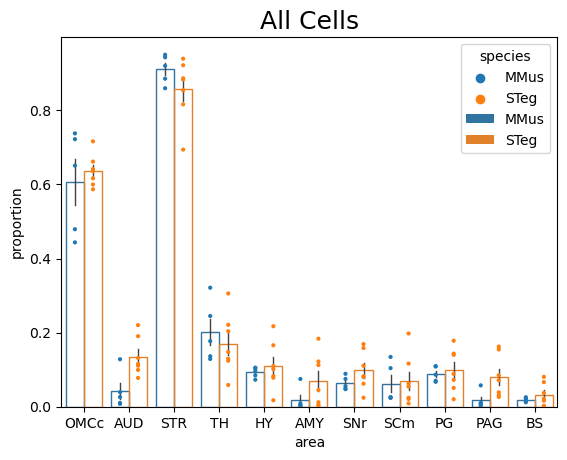

In [45]:
# create dataframe for plotting proportions
plot_df = pd.DataFrame(columns=["area", "proportion", "mice", "species"])
for i in range(num_samples):
    df = omc_clean[i].drop(["OMCi", "type"], axis=1)
    bc_sum = df.sum()
    proportion = bc_sum/df.shape[0]
    df_add = pd.DataFrame({"area":proportion.index.values, "proportion":proportion.values, 
    "mice":mice[i], "species":species[i]})
    plot_df = pd.concat([plot_df, df_add])

sns.catplot(plot_df, x="area", y="proportion", hue="species", kind="bar")
# plt.savefig(out_path + "all_hist_bar.jpeg", dpi=300, bbox_inches="tight")
plt.show()

dot_bar_plot(plot_df, "All Cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()

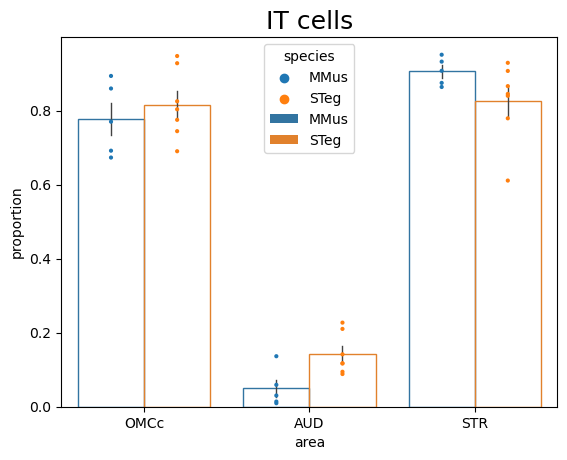

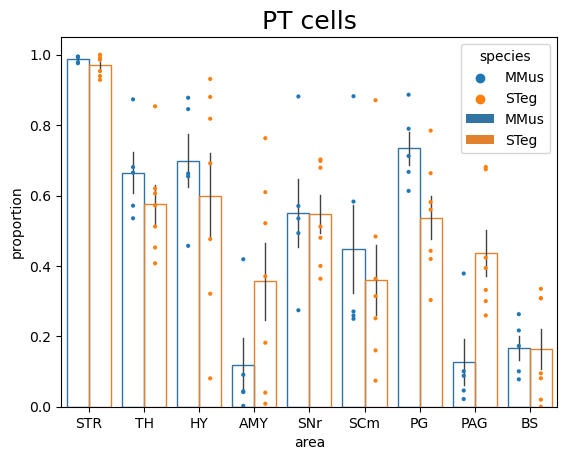

In [41]:
### IT

# create dataframe for plotting proportions
plot_df = pd.DataFrame(columns=["area", "proportion", "mice", "species"])
for i in range(num_samples):
    df = omc_it[i].drop(["OMCi", 'TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG',
       'PAG', 'BS'], axis=1)
    bc_sum = df.sum()
    proportion = bc_sum/df.shape[0]
    df_add = pd.DataFrame({"area":proportion.index.values, "proportion":proportion.values, 
    "mice":mice[i], "species":species[i]})
    plot_df = pd.concat([plot_df, df_add])

dot_bar_plot(plot_df, "IT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()

### PT
# create dataframe for plotting proportions
plot_df = pd.DataFrame(columns=["area", "proportion", "mice", "species"])
for i in range(num_samples):
    df = omc_pt[i].drop(["OMCi",'OMCc', 'AUD'], axis=1)
    bc_sum = df.sum()
    proportion = bc_sum/df.shape[0]
    df_add = pd.DataFrame({"area":proportion.index.values, "proportion":proportion.values, 
    "mice":mice[i], "species":species[i]})
    plot_df = pd.concat([plot_df, df_add])

dot_bar_plot(plot_df, "PT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()

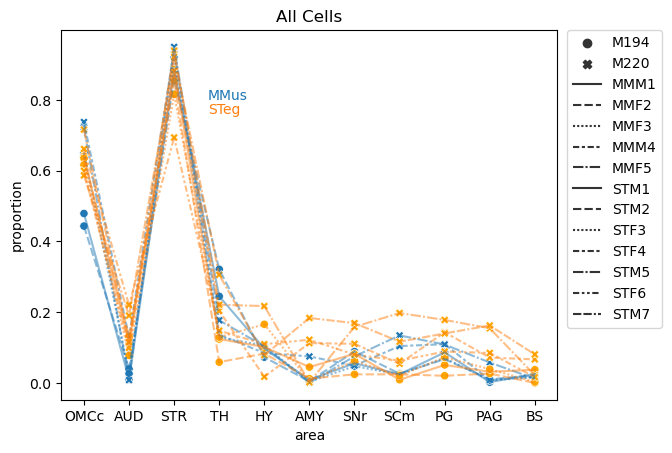

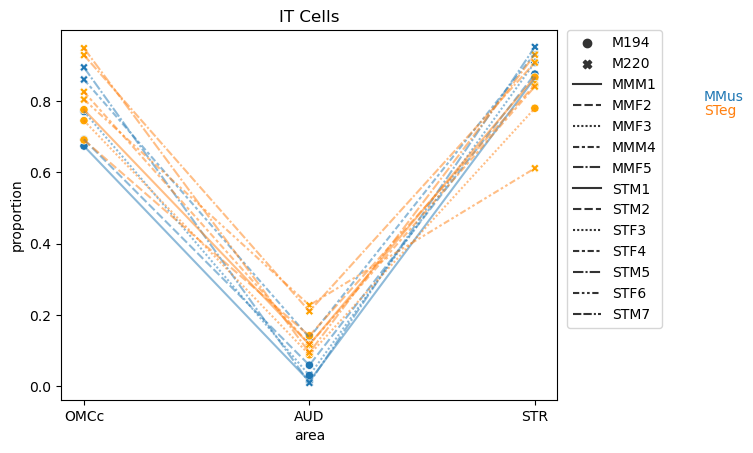

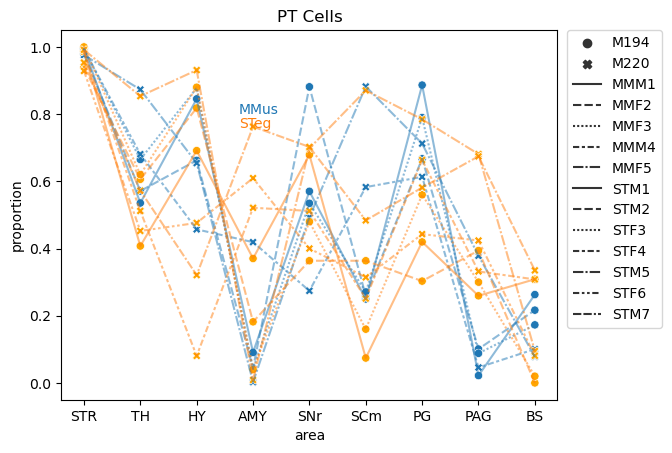

In [10]:
plot_df = pd.DataFrame(columns=["area", "proportion", "mice", "species"])
for i in range(num_samples):
    df = omc_clean[i].drop(["OMCi", "type"], axis=1)
    bc_sum = df.sum()
    proportion = bc_sum/df.shape[0]
    df_add = pd.DataFrame({"area":proportion.index.values, "proportion":proportion.values, 
    "mouse":mice[i], "Species":species[i], "Dataset":dataset[i]})
    plot_df = pd.concat([plot_df, df_add])

individ_node_plot(plot_df, "All Cells", xaxis="area", yaxis="proportion")
plt.show()

plot_df = pd.DataFrame(columns=["area", "proportion", "mice", "species"])
for i in range(num_samples):
    df = omc_it[i].drop(["OMCi", 'TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG',
       'PAG', 'BS'], axis=1)
    bc_sum = df.sum()
    proportion = bc_sum/df.shape[0]
    df_add = pd.DataFrame({"area":proportion.index.values, "proportion":proportion.values, 
    "mouse":mice[i], "Species":species[i], "Dataset":dataset[i]})
    plot_df = pd.concat([plot_df, df_add])

individ_node_plot(plot_df, "IT Cells", xaxis="area", yaxis="proportion")
plt.show()

plot_df = pd.DataFrame(columns=["area", "proportion", "mice", "species"])
for i in range(num_samples):
    df = omc_pt[i].drop(["OMCi",'OMCc', 'AUD'], axis=1)
    bc_sum = df.sum()
    proportion = bc_sum/df.shape[0]
    df_add = pd.DataFrame({"area":proportion.index.values, "proportion":proportion.values, 
    "mouse":mice[i], "Species":species[i], "Dataset":dataset[i]})
    plot_df = pd.concat([plot_df, df_add])

individ_node_plot(plot_df, "PT Cells", xaxis="area", yaxis="proportion")
plt.show()

# seperate by cell type

- omc_mm = [ ]
- omc_st = [ ]
- omc_pt_mm = [ ]
- omc_pt_st = [ ]
- omc_it_mm = [ ]
- omc_it_st = [ ]

# Dot Plots

In [ ]:
it_OMC_proportions = []

# OMC proportions
for i in range(num_samples):
    total = omc_it[i].shape[0]
    prop = omc_it[i].sum()/total
    it_OMC_proportions.append(prop)


In [ ]:
# dot plots for individual areas
areas = omc_it[0].columns

all_it_OMC_proportions = []
for area in areas:
    area_proportion = metadata[["mice", "species", "dataset"]]
    area_prop = []
    for i in range(num_samples):
        area_prop.append(it_OMC_proportions[i][area])

    area_proportion['proportion'] = area_prop
    
    all_it_OMC_proportions.append(area_proportion)

In [ ]:
areasi = pd.Series(data=list(range(len(areas))), index=areas)
# areasi

In [ ]:
all_it_OMC_proportions

In [ ]:
# AUD
i = areasi["AUD"]
# plt.figure(figsize=(7,7))
df = all_it_OMC_proportions[i]
# sns.catplot(data=df, x="species", y="proportion", hue="species", kind='point', 
#             errorbar=('ci',95), estimator=np.mean, n_boot=300)
sns.catplot(data=df, x="species", y="proportion", hue="species", size=10)
plt.title("IT - " + areas[i], size=20)
plt.ylim((0))
#     ax.set_ylim(-0.1,1.1)
# for j in range(df.shape[0]):
#     if df.species[j]=="Mmus":
#         k=0
#     else:
#         k=1
#     plt.text(x=k,y=df.proportion[j]+0.001,s=df.mice[j], 
#           fontdict=dict(color='black', size=12))
# plt.savefig(out_path+"it_aud_dotplot.jpeg", dpi=300, bbox_inches='tight')
df

In [ ]:
# OMCc
i = areasi["OMCc"]
df = all_it_OMC_proportions[i]
sns.catplot(data=df, x="species", y="proportion", hue="species", size=10)
plt.title("IT - " + areas[i], size=20)
plt.ylim((0))

df
# plt.savefig(out_path+"it_omcc_dotplot.jpeg", dpi=300, bbox_inches='tight')

In [ ]:
# STR
i = areasi["STR"]
df = all_it_OMC_proportions[i]
sns.catplot(data=df, x="species", y="proportion", hue="species", size=10)
plt.title("IT - " + areas[i], size=20)
plt.ylim((0))

# plt.savefig(out_path+"it_STR_dotplot.jpeg", dpi=300, bbox_inches='tight')

In [ ]:
pt_OMC_proportions = []

# OMC proportions
for i in range(num_samples):
    total = omc_pt[i].shape[0]
    prop = omc_pt[i].sum()/total
    pt_OMC_proportions.append(prop)


# dot plots for individual areas
areas = omc_pt[0].columns

all_pt_OMC_proportions = []
for area in areas:
    area_proportion = metadata[["mice", "species", "dataset"]]
    area_prop = []
    for i in range(num_samples):
        area_prop.append(pt_OMC_proportions[i][area])

    area_proportion['proportion'] = area_prop
    
    all_pt_OMC_proportions.append(area_proportion)

In [ ]:
# PAG
i = areasi["PAG"]
df = all_pt_OMC_proportions[i]
sns.catplot(data=df, x="species", y="proportion", hue="species", size=10)
plt.title("PT - " + areas[i], size=20)
plt.ylim((0))

# plt.savefig(out_path+"pt_PAG_dotplot.jpeg", dpi=300, bbox_inches='tight')

In [ ]:
# SNr
i = areasi["SNr"]
df = all_pt_OMC_proportions[i]
sns.catplot(data=df, x="species", y="proportion", hue="species", size=10)
plt.title("PT - " + areas[i], size=20)
plt.ylim((0))

# plt.savefig(out_path+"pt_SNr_dotplot.jpeg", dpi=300, bbox_inches='tight')

# histograms

In [ ]:
# combine it/pt into one df
omc_mm_it_all = pd.concat(omc_it_mm)
omc_mm_pt_all = pd.concat(omc_pt_mm)
omc_st_it_all = pd.concat(omc_it_st)
omc_st_pt_all = pd.concat(omc_pt_st)


In [ ]:
# create histograms by sampling 100 neurons

###### functions
def est_proj_prob(bin_proj, reps=1000, sample_size=300):
    """
    funtion takes subsample of projection matrix and repetitions as input.
    Funtion outputs vector where dim0 = projection probability of subsample, and dim1 = repetition
    """
    
    est_probs = []
    for i in range(reps):
        new = bin_proj.sample(sample_size)
        est_probs.append(new.sum()/sample_size)
        
#         if i%100 == 0:
#             print('finished simulation', i)
        
    return np.array(est_probs)

In [ ]:
sim_reps = 1000
sim_sample_size=300

In [ ]:
# create distribution by randomly sampling data
mm_it_probs = est_proj_prob(omc_mm_it_all, reps=sim_reps, sample_size=sim_sample_size)
    
# calculate fraction of projections in singing mice
st_it_probs = est_proj_prob(omc_st_it_all, reps=sim_reps, sample_size=sim_sample_size)

mm_it_probs = pd.DataFrame(mm_it_probs, columns=omc_mm_it_all.columns)
st_it_probs = pd.DataFrame(st_it_probs, columns=omc_st_it_all.columns)


In [ ]:
# AUD
areas = mm_it_probs.columns
areasi = pd.Series(data=list(range(len(areas))), index=areas)
i = areasi["AUD"]
plt.hist(mm_it_probs[areas[i]], alpha=0.3, label="Mmus")
plt.hist(st_it_probs[areas[i]], alpha=0.3, label="Steg")
plt.legend()
plt.title("IT - " + areas[i])
plt.xlabel("Neuron Proportion")
plt.ylabel("Frequency")
plt.xlim((0))
# plt.savefig(out_path+"OMC_it_AUD_hist.jpeg", dpi=300)


In [ ]:
# OMCc
areas = mm_it_probs.columns
areasi = pd.Series(data=list(range(len(areas))), index=areas)
i = areasi["OMCc"]
plt.hist(mm_it_probs[areas[i]], alpha=0.3, label="Mmus")
plt.hist(st_it_probs[areas[i]], alpha=0.3, label="Steg")
plt.legend()
plt.title("IT - " + areas[i])
plt.xlabel("Neuron Proportion")
plt.ylabel("Frequency")
plt.xlim((0))

# plt.savefig(out_path+"OMC_it_OMCc_hist.jpeg", dpi=300)


In [ ]:
# STR
areas = mm_it_probs.columns
areasi = pd.Series(data=list(range(len(areas))), index=areas)
i = areasi["STR"]
plt.hist(mm_it_probs[areas[i]], alpha=0.3, label="Mmus")
plt.hist(st_it_probs[areas[i]], alpha=0.3, label="Steg")
plt.legend()
plt.title("IT - " + areas[i])
plt.xlabel("Neuron Proportion")
plt.ylabel("Frequency")
plt.xlim((0))

# plt.savefig(out_path+"OMC_it_STR_hist.jpeg", dpi=300)


In [ ]:
# create distribution by randomly sampling data
mm_pt_probs = est_proj_prob(omc_mm_pt_all, reps=sim_reps, sample_size=sim_sample_size)
    
# calculate fraction of projections in singing mice
st_pt_probs = est_proj_prob(omc_st_pt_all, reps=sim_reps, sample_size=sim_sample_size)

mm_pt_probs = pd.DataFrame(mm_pt_probs, columns=omc_mm_pt_all.columns)
st_pt_probs = pd.DataFrame(st_pt_probs, columns=omc_st_pt_all.columns)


In [ ]:
# PAG
areas = mm_pt_probs.columns
areasi = pd.Series(data=list(range(len(areas))), index=areas)
i = areasi["PAG"]
plt.hist(mm_pt_probs[areas[i]], alpha=0.3, label="Mmus")
plt.hist(st_pt_probs[areas[i]], alpha=0.3, label="Steg")
plt.legend()
plt.title("PT - " + areas[i])
plt.xlabel("Neuron Proportion")
plt.ylabel("Frequency")
plt.xlim((0))

# plt.savefig(out_path+"OMC_pt_PAG_hist.jpeg", dpi=300)


In [ ]:
# SNr
areas = mm_pt_probs.columns
areasi = pd.Series(data=list(range(len(areas))), index=areas)
i = areasi["SNr"]
plt.hist(mm_pt_probs[areas[i]], alpha=0.3, label="Mmus")
plt.hist(st_pt_probs[areas[i]], alpha=0.3, label="Steg")
plt.legend()
plt.title("PT - " + areas[i])
plt.xlabel("Neuron Proportion")
plt.ylabel("Frequency")
plt.xlim((0))

# plt.savefig(out_path+"OMC_pt_SNr_hist.jpeg", dpi=300)


# Volcano plot

In [ ]:
# calculate means
mm_it_means = mm_it_probs.mean()
st_it_means = st_it_probs.mean()

p_vals = []
for i in range(len(areas)):
    roi = areas[i]
    if st_it_means[roi] > mm_it_means[roi]: # if st mean>mm mean, look for values greater
        above = st_it_probs[roi] > mm_it_means[roi]
        n_above= sum(above)
        p_vals.append(1 - n_above/sim_reps)
    elif st_it_means[roi] < mm_it_means[roi]: #else if st mean < mm mean, look for values lesser
        below = st_it_probs[roi] < mm_it_means[roi]
        n_below = sum(below)
        p_vals.append(1 - n_below/sim_reps)
    elif st_it_means[roi] == mm_it_means[roi]:
        above = st_it_probs[roi] > mm_it_means[roi]
        n_above= sum(above)
        p_vals.append(1 - n_above/sim_reps)
    elif st_it_means[roi]==mm_it_means[roi] and st_it_means[roi] == 0:
        p_vals.append(1)
    



In [ ]:
plot_it = pd.DataFrame({"area":areas})
plot_it["p-value"] = p_vals
plot_it["mm_mean"] = mm_it_means.values
plot_it["st_mean"] = st_it_means.values
plot_it["effect_size"] = (plot_it["st_mean"]-plot_it["mm_mean"]) / (plot_it["st_mean"] + plot_it["mm_mean"])
plot_it["nlog10_p"] = -np.log10(plot_it["p-value"]+0.0001)
plot_it

In [ ]:
# drop irrelevant rows
non_it = ["OB", "OMCi", "ACAi", "ACAc", "TH", "AMY", "HIP", "SNr", "SCm", "PG", "PAG", "RN"]
idx = plot_it["area"].isin(non_it)
plot_it = plot_it[~idx].reset_index(drop=True)
plot_it

In [ ]:

df = plot_it

x=df.effect_size
y=df.nlog10_p

plt.scatter(x,y, size=10)
plt.xlim([-1,1])
# plt.ylim([-0.1,4])
plt.axline((0, 0), (0, 1),linestyle='--', linewidth=0.5)
plt.axline((0, 0), (1, 0),linestyle='--', linewidth=0.5)
plt.axline((0, -np.log10(0.05)), (1,  -np.log10(0.05)),linestyle='--', color='r', alpha=0.75)
plt.text(-0.9, -np.log10(0.05)+.015, 'p<0.05', color='r', alpha=0.75)
plt.axline((0, -np.log10(0.01)), (1,  -np.log10(0.01)),linestyle='--', color='r', alpha=0.5)
plt.text(-0.9, -np.log10(0.01)+.015, 'p<0.01', color='r', alpha=0.75)


for i in range(df.shape[0]):
    plt.text(x=df.effect_size[i]+0.01,y=df.nlog10_p[i]+0.01,s=df.area[i], 
          fontdict=dict(color='black',size=10))


plt.title("OMC - IT")
plt.xlabel('Modulation Index')
plt.ylabel('-log10(p-value)')
# plt.savefig(out_f+'proj_prob_volcano.jpg',dpi=300, bbox_inches='tight')
# plt.savefig(out_f+'proj_prob_volcano.svg',dpi=300, bbox_inches='tight')

In [ ]:
# calculate means
mm_pt_means = mm_pt_probs.mean()
st_pt_means = st_pt_probs.mean()

p_vals = []
for i in range(len(areas)):
    roi = areas[i]
    if st_pt_means[roi] > mm_pt_means[roi]: # if st mean>mm mean, look for values greater
        above = st_pt_probs[roi] > mm_pt_means[roi]
        n_above= sum(above)
        p_vals.append(1 - n_above/sim_reps)
    elif st_pt_means[roi] < mm_pt_means[roi]: #else if st mean < mm mean, look for values lesser
        below = st_pt_probs[roi] < mm_pt_means[roi]
        n_below = sum(below)
        p_vals.append(1 - n_below/sim_reps)
    elif st_pt_means[roi] == mm_pt_means[roi]:
        above = st_pt_probs[roi] > mm_pt_means[roi]
        n_above= sum(above)
        p_vals.append(1 - n_above/sim_reps)
    elif st_pt_means[roi]==mm_pt_means[roi] and st_pt_means[roi] == 0:
        p_vals.append(1)
    



plot_pt = pd.DataFrame({"area":areas})
plot_pt["p-value"] = p_vals
plot_pt["mm_mean"] = mm_pt_means.values
plot_pt["st_mean"] = st_pt_means.values
plot_pt["effect_size"] = (plot_pt["st_mean"]-plot_pt["mm_mean"]) / (plot_pt["st_mean"] + plot_pt["mm_mean"])
plot_pt["nlog10_p"] = -np.log10(plot_pt["p-value"]+0.0001)
plot_pt

In [ ]:
# drop irrelevant rows
non_pt = ["OB", "OMCi", "ACAi", "ACAc", "HIP"]
idx = plot_pt["area"].isin(non_pt)
plot_pt = plot_pt[~idx].reset_index(drop=True)


In [ ]:
df = plot_pt

x=df.effect_size
y=df.nlog10_p

plt.scatter(x,y)
plt.xlim([-1,1])
# plt.ylim([-0.1,4])
plt.axline((0, 0), (0, 1),linestyle='--', linewidth=0.5)
plt.axline((0, 0), (1, 0),linestyle='--', linewidth=0.5)
plt.axline((0, -np.log10(0.05)), (1,  -np.log10(0.05)),linestyle='--', color='r', alpha=0.75)
plt.text(-0.9, -np.log10(0.05)+.015, 'p<0.05', color='r', alpha=0.75)
plt.axline((0, -np.log10(0.01)), (1,  -np.log10(0.01)),linestyle='--', color='r', alpha=0.5)
plt.text(-0.9, -np.log10(0.01)+.015, 'p<0.01', color='r', alpha=0.75)


for i in range(df.shape[0]):
    plt.text(x=df.effect_size[i]+0.01,y=df.nlog10_p[i]+0.01,s=df.area[i], 
          fontdict=dict(color='black',size=10))


plt.title("OMC - PT")
plt.xlabel('Modulation Index')
plt.ylabel('-log10(p-value)')
# plt.savefig(out_f+'proj_prob_volcano.jpg',dpi=300, bbox_inches='tight')
# plt.savefig(out_f+'proj_prob_volcano.svg',dpi=300, bbox_inches='tight')

# try with t-test

In [ ]:
mmus_it_prop = []
steg_it_prop = []
for i in range(len(all_it_OMC_proportions)):
    df = all_it_OMC_proportions[i]
    mm = df[df["species"]=="Mmus"]
    mmus_it_prop.append(mm["proportion"])
    st = df[df["species"]=="Steg"]
    steg_it_prop.append(st["proportion"])
mmus_it_array = np.array(mmus_it_prop)
steg_it_array = np.array(steg_it_prop)


In [ ]:

pd.set_option('display.max_rows', None)
# results = stats.ttest_ind(mmus_it_array, steg_it_array, axis=1) # parametric
results = stats.mannwhitneyu(mmus_it_array, steg_it_array, axis=1) # non-parametric test
p_vals = results[1]
plot = pd.DataFrame({"area":areas, "p-value":p_vals})

plot["mm_mean"] = mmus_it_array.mean(axis=1)
plot["st_mean"] = steg_it_array.mean(axis=1)
plot["effect_size"] = (plot["st_mean"]-plot["mm_mean"]) / (plot["st_mean"] + plot["mm_mean"])
plot["nlog10_p"] = -np.log10(plot["p-value"])

# drop irrelevant rows
non_it = ["OB", "OMCi", "ACAi", "ACAc", "TH", "AMY", "HIP", "SNr", "SCm", "PG", "PAG", "RN"]
idx = plot["area"].isin(non_it)
plot = plot[~idx].reset_index(drop=True)


plot



In [ ]:

df = plot

x=df.effect_size
y=df.nlog10_p

plt.scatter(x,y, s=25)
plt.xlim([-1,1])
# plt.ylim([-0.1,4])
plt.axline((0, 0), (0, 1),linestyle='--', linewidth=0.5)
plt.axline((0, 0), (1, 0),linestyle='--', linewidth=0.5)
plt.axline((0, -np.log10(0.05)), (1,  -np.log10(0.05)),linestyle='--', color='r', alpha=0.75, linewidth=0.5)
plt.text(-0.9, -np.log10(0.05)+.015, 'p<0.05', color='r', alpha=0.75)
plt.axline((0, -np.log10(0.01)), (1,  -np.log10(0.01)),linestyle='--', color='r', alpha=0.5, linewidth=0.5)
plt.text(-0.9, -np.log10(0.01)+.015, 'p<0.01', color='r', alpha=0.75)


for i in range(df.shape[0]):
    plt.text(x=df.effect_size[i]+0.01,y=df.nlog10_p[i]+0.01,s=df.area[i], 
          fontdict=dict(color='black',size=10))


plt.title("OMC - IT")
plt.xlabel('Modulation Index')
plt.ylabel('-log10(p-value)')
# plt.savefig(out_path+'omc_it_volcano.jpg',dpi=300, bbox_inches='tight')
# plt.savefig(out_path+'omc_it_volcano.svg',dpi=300, bbox_inches='tight')

In [ ]:
mmus_pt_prop = []
steg_pt_prop = []
for i in range(len(all_pt_OMC_proportions)):
    df = all_pt_OMC_proportions[i]
    mm = df[df["species"]=="Mmus"]
    mmus_pt_prop.append(mm["proportion"])
    st = df[df["species"]=="Steg"]
    steg_pt_prop.append(st["proportion"])
mmus_pt_array = np.array(mmus_pt_prop)
steg_pt_array = np.array(steg_pt_prop)

pd.set_option('display.max_rows', None)
results = stats.ttest_ind(mmus_pt_array, steg_pt_array, axis=1)
p_vals = results[1]
plot = pd.DataFrame({"area":areas, "p-value":p_vals})

plot["mm_mean"] = mmus_pt_array.mean(axis=1)
plot["st_mean"] = steg_pt_array.mean(axis=1)
plot["effect_size"] = (plot["st_mean"]-plot["mm_mean"]) / (plot["st_mean"] + plot["mm_mean"])
plot["nlog10_p"] = -np.log10(plot["p-value"])

# drop irrelevant rows
non_pt = ["OB", "OMCi", "ACAi", "ACAc", "HIP"]
idx = plot["area"].isin(non_pt)
plot = plot[~idx].reset_index(drop=True)






df = plot

x=df.effect_size
y=df.nlog10_p

plt.scatter(x,y, s=25)
plt.xlim([-1,1])
# plt.ylim([-0.1,4])
plt.axline((0, 0), (0, 1),linestyle='--', linewidth=0.5)
plt.axline((0, 0), (1, 0),linestyle='--', linewidth=0.5)
plt.axline((0, -np.log10(0.05)), (1,  -np.log10(0.05)),linestyle='--', color='r', alpha=0.75, linewidth=0.5)
plt.text(-0.9, -np.log10(0.05)+.015, 'p<0.05', color='r', alpha=0.75)
plt.axline((0, -np.log10(0.01)), (1,  -np.log10(0.01)),linestyle='--', color='r', alpha=0.5, linewidth=0.5)
plt.text(-0.9, -np.log10(0.01)+.015, 'p<0.01', color='r', alpha=0.75)


for i in range(df.shape[0]):
    plt.text(x=df.effect_size[i]+0.01,y=df.nlog10_p[i]+0.01,s=df.area[i], 
          fontdict=dict(color='black',size=10))


plt.title("OMC - PT")
plt.xlabel('Modulation Index')
plt.ylabel('-log10(p-value)')
# plt.savefig(out_path+'omc_pt_volcano.jpg',dpi=300, bbox_inches='tight')
# plt.savefig(out_path+'omc_pt_volcano.svg',dpi=300, bbox_inches='tight')
